# Predicting what drives the price of a car?

**OVERVIEW**

In this notebook we will explore and provide an in-depth analyis of a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars. The smaller dataset ensures speed of processing.  

**Goal of Analysis**

The goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem. 

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>

Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Problem Definition

In a statement,
> Given key parameters about used cars, can we predict whether or not they are valuable to used car buyers? How do those factors make a car more or less expensive?

To maximize profits a used car dealership must not only house a healthy inventory of cars with competitive prices but also a car inventory that posses features, which customers of different backgrounds consider valuable for purchase. To increase the likelyhood of purchase the used car agency must build the correct type of inventory using as reference the analysis of reliable data and sale predictions.   

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.

The attributes of this data set include:

### Preparing the tools
We are going to use pandas, Matplotlib, sklearn and numpy for data analysis and manipulation.

#### Library Imports

In [431]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from numpy import arange
from pandas import read_csv
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, RFE
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression , Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures

pd.set_option('display.max_columns', None)
%matplotlib notebook

#### Load the Data

In [255]:
data = pd.read_csv('data/vehicles.csv')

### Data Exploration
**Goal** Understand the data set, sanitize the data and become an expert on its details. The intent is to answer the main key question:

**What drives the price of a car?**

As part of the data exploration the following questions come to mind:
 - What features have strong correlation with the prices?
     - Does the type of transmission have an impact in price?
     - Is the number of cylinders impact price?
 - Are there any features with missing values?
 - What data types does the dataset have available?
 - Do we have categorical features? Do any of them need to be encoded?
 - How do we make projections on profits based on the base purchase price of the car (i.e. the price the Agency paid for the car)?


In [256]:
# What is the shape of our dataset (rows, columns)
data.shape

(426880, 18)

In [257]:
# Any obvious numerical correlations?
data.corr()

,id,price,year,odometer
id,1.000000,-0.002779,-0.059040,0.010721
price,-0.002779,1.000000,-0.004925,0.010032
year,-0.059040,-0.004925,1.000000,-0.157215
odometer,0.010721,0.010032,-0.157215,1.000000


**OBSERVATION:** The only numerical values are id, price, year and odometer. The data shows the following correlations with regards to price:
- little correlation with ID (at ~ -0.00278),  
- little stronger correlation with the year (at ~ -0.00493)
- stronger positive correlation with odometer (at ~ 0.010032)

In [258]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [259]:
# What columns/features do we have present and their type? Are there any null values?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**OBSERVATION:** No null values but is there missing data?

In [260]:
# Does the dataset have missing or problematic data?
data.isna().sum().sort_values(ascending=False)
# or data.isnull().sum().sort_values(ascending=False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

In [261]:
car_title_status = data[data['title_status'] != "clean"]
car_title_status.groupby('title_status')['id'].count()

title_status
lien          1422
missing        814
parts only     198
rebuilt       7219
salvage       3868
Name: id, dtype: int64

In [262]:
# Do we have unique values in the columns
data.nunique(axis=0).sort_values(ascending=False)

id              426880
VIN             118246
odometer        104870
model            29649
price            15655
region             404
year               114
state               51
manufacturer        42
type                13
paint_color         12
cylinders            8
condition            6
title_status         6
fuel                 5
size                 4
transmission         3
drive                3
dtype: int64

In [263]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [264]:
data.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [265]:
# Get numeric columns
cols = data.columns
num_cols = data._get_numeric_data().columns
num_cols

Index(['id', 'price', 'year', 'odometer'], dtype='object')

In [266]:
# Categoricl columns
data.select_dtypes(include=['object']).columns.tolist()

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [267]:
# Check the unique values for each categorical feature
for f in data.select_dtypes(include=['object']).columns.tolist():
    print(f'Feature: {f}')
    print(data[f].unique())

Feature: region
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colorado

In [268]:
# How many older cars (year 1999 and earlier) do we have in this dataset?
cars_years = data[data['year'] <= 1999 ]
cars_years.groupby('year')['id'].count()

year
1900.0      12
1901.0       3
1902.0       1
1903.0      12
1905.0       1
          ... 
1995.0    1246
1996.0    1302
1997.0    1724
1998.0    1988
1999.0    3094
Name: id, Length: 91, dtype: int64

In [269]:
# Understanding other categorical values
data['year'].median()

2013.0

In [270]:
data.notna().sum().sort_values(ascending=False)

id              426880
region          426880
state           426880
price           426880
year            425675
transmission    424324
fuel            423867
odometer        422480
model           421603
title_status    418638
manufacturer    409234
type            334022
paint_color     296677
drive           296313
VIN             265838
condition       252776
cylinders       249202
size            120519
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [271]:
# Curious, what are the % of missing values in each column for this dataset?
percent_of_data_missing = data.isnull().mean().round(4).mul(100).sort_values(ascending=False)
percent_of_data_missing

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
id               0.00
region           0.00
price            0.00
state            0.00
dtype: float64

In [272]:
data.isnull().sum().sort_values(ascending=False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

#### Converting data types to easier to analyze data types

In [273]:
# The unique values above for categorical data 'cylinders' showed entries that can easily be converted to integers
data['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [274]:
data['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [275]:
# Let's ignore 'other' entry for cylinders and replace all Nan values with 0.
data = data[data['cylinders'] != 'other']
data['cylinders'].fillna(0, inplace=True)

In [276]:
# Now let's convert the cylinders feature to integer values.
mapping = {'3 cylinders': 3,'4 cylinders': 4,'5 cylinders': 5,  '6 cylinders': 6, '8 cylinders': 8,'10 cylinders':10,
          '12 cylinders': 12, '0': 0}

data = data.replace({'cylinders': mapping})

In [277]:
data['cylinders'].info()

<class 'pandas.core.series.Series'>
Int64Index: 425582 entries, 0 to 426879
Series name: cylinders
Non-Null Count   Dtype
--------------   -----
425582 non-null  int64
dtypes: int64(1)
memory usage: 6.5 MB


In [278]:
# Now let's convert all those zeros (previously NaNs) to the most common value, which is 6 cylinders 
# since the amount of zeros is high.
data['cylinders'].value_counts()

0     177678
6      94169
4      77642
8      72062
5       1712
10      1455
3        655
12       209
Name: cylinders, dtype: int64

In [279]:
# Lets do the value replacement in place
data.loc[data['cylinders'] == 0, 'cylinders'] = 6
data['cylinders'].value_counts()

6     271847
4      77642
8      72062
5       1712
10      1455
3        655
12       209
Name: cylinders, dtype: int64

#### Dealing with our missing data -- drop, replace, other...
Implementation of the decisions

In [280]:
# Drop columns that don't seem to add additional value to the data we are analyzing.
data.drop(columns=['id', 'model', 'region','size','title_status','VIN'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425582 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         425582 non-null  int64  
 1   year          424377 non-null  float64
 2   manufacturer  408170 non-null  object 
 3   condition     252022 non-null  object 
 4   cylinders     425582 non-null  int64  
 5   fuel          422572 non-null  object 
 6   odometer      421184 non-null  float64
 7   transmission  423026 non-null  object 
 8   drive         295346 non-null  object 
 9   type          332978 non-null  object 
 10  paint_color   295770 non-null  object 
 11  state         425582 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 42.2+ MB


In [281]:
data.isna().sum().sort_values(ascending=False)

condition       173560
drive           130236
paint_color     129812
type             92604
manufacturer     17412
odometer          4398
fuel              3010
transmission      2556
year              1205
price                0
cylinders            0
state                0
dtype: int64

In [282]:
value_counts_dict = data[['fuel', 'paint_color', 'transmission']].value_counts().index[0]
value_counts_dict

('gas', 'white', 'automatic')

#### Fill-in NaN values with values that make sense for analysis

In [283]:
# 1. Fuel, paint_color & transmission - use the most common value based on counts
data['fuel'].fillna(data['fuel'].value_counts().index[0], inplace=True)
data['paint_color'].fillna(data['paint_color'].value_counts().index[0], inplace=True)
data['transmission'].fillna(data['transmission'].value_counts().index[0], inplace=True)

data.isna().sum().sort_values(ascending=False)

condition       173560
drive           130236
type             92604
manufacturer     17412
odometer          4398
year              1205
price                0
cylinders            0
fuel                 0
transmission         0
paint_color          0
state                0
dtype: int64

In [284]:
# 2. Ignore all NaN values for features: drive, manufacturer and type
data = data[data['drive'].notna()]
data = data[data['manufacturer'].notna()]
data = data[data['type'].notna()]

In [285]:
# After using notna() we have many absent indexes. We need to reset the index
#data = data.reset_index(drop=True)
data.shape

(254712, 12)

In [286]:
data.isna().sum().sort_values(ascending=False)

condition       88687
odometer         2534
year                6
price               0
manufacturer        0
cylinders           0
fuel                0
transmission        0
drive               0
type                0
paint_color         0
state               0
dtype: int64

**OBSERVATION:** The above transformation will leave us with condition, odometer and year with NaN values. We can do more. The NaN count for condition is higher (at 88687) than the most common value'good' (75097), so replacing them with the most common value doesn't quiet make sense.

In [287]:
# 3. The NaN year values can easily be replaced with the median
data['year'].fillna(data['year'].median(), inplace=True)

In [288]:
# 4. Replace the NaN odometer values with the average of the total
data['odometer'].fillna(data['odometer'].mean(), inplace=True)

In [289]:
# Plot the price of the car by odometer reading
data_slice = data[['odometer', 'price']]
data_sample = data_slice.sample(n=100, random_state=1)
data_sample.head()

,odometer,price
209394,84498.0,32990
87325,111358.0,0
320010,79217.0,0
402966,84938.0,36999
78091,160.0,8500


<IPython.core.display.Javascript object>


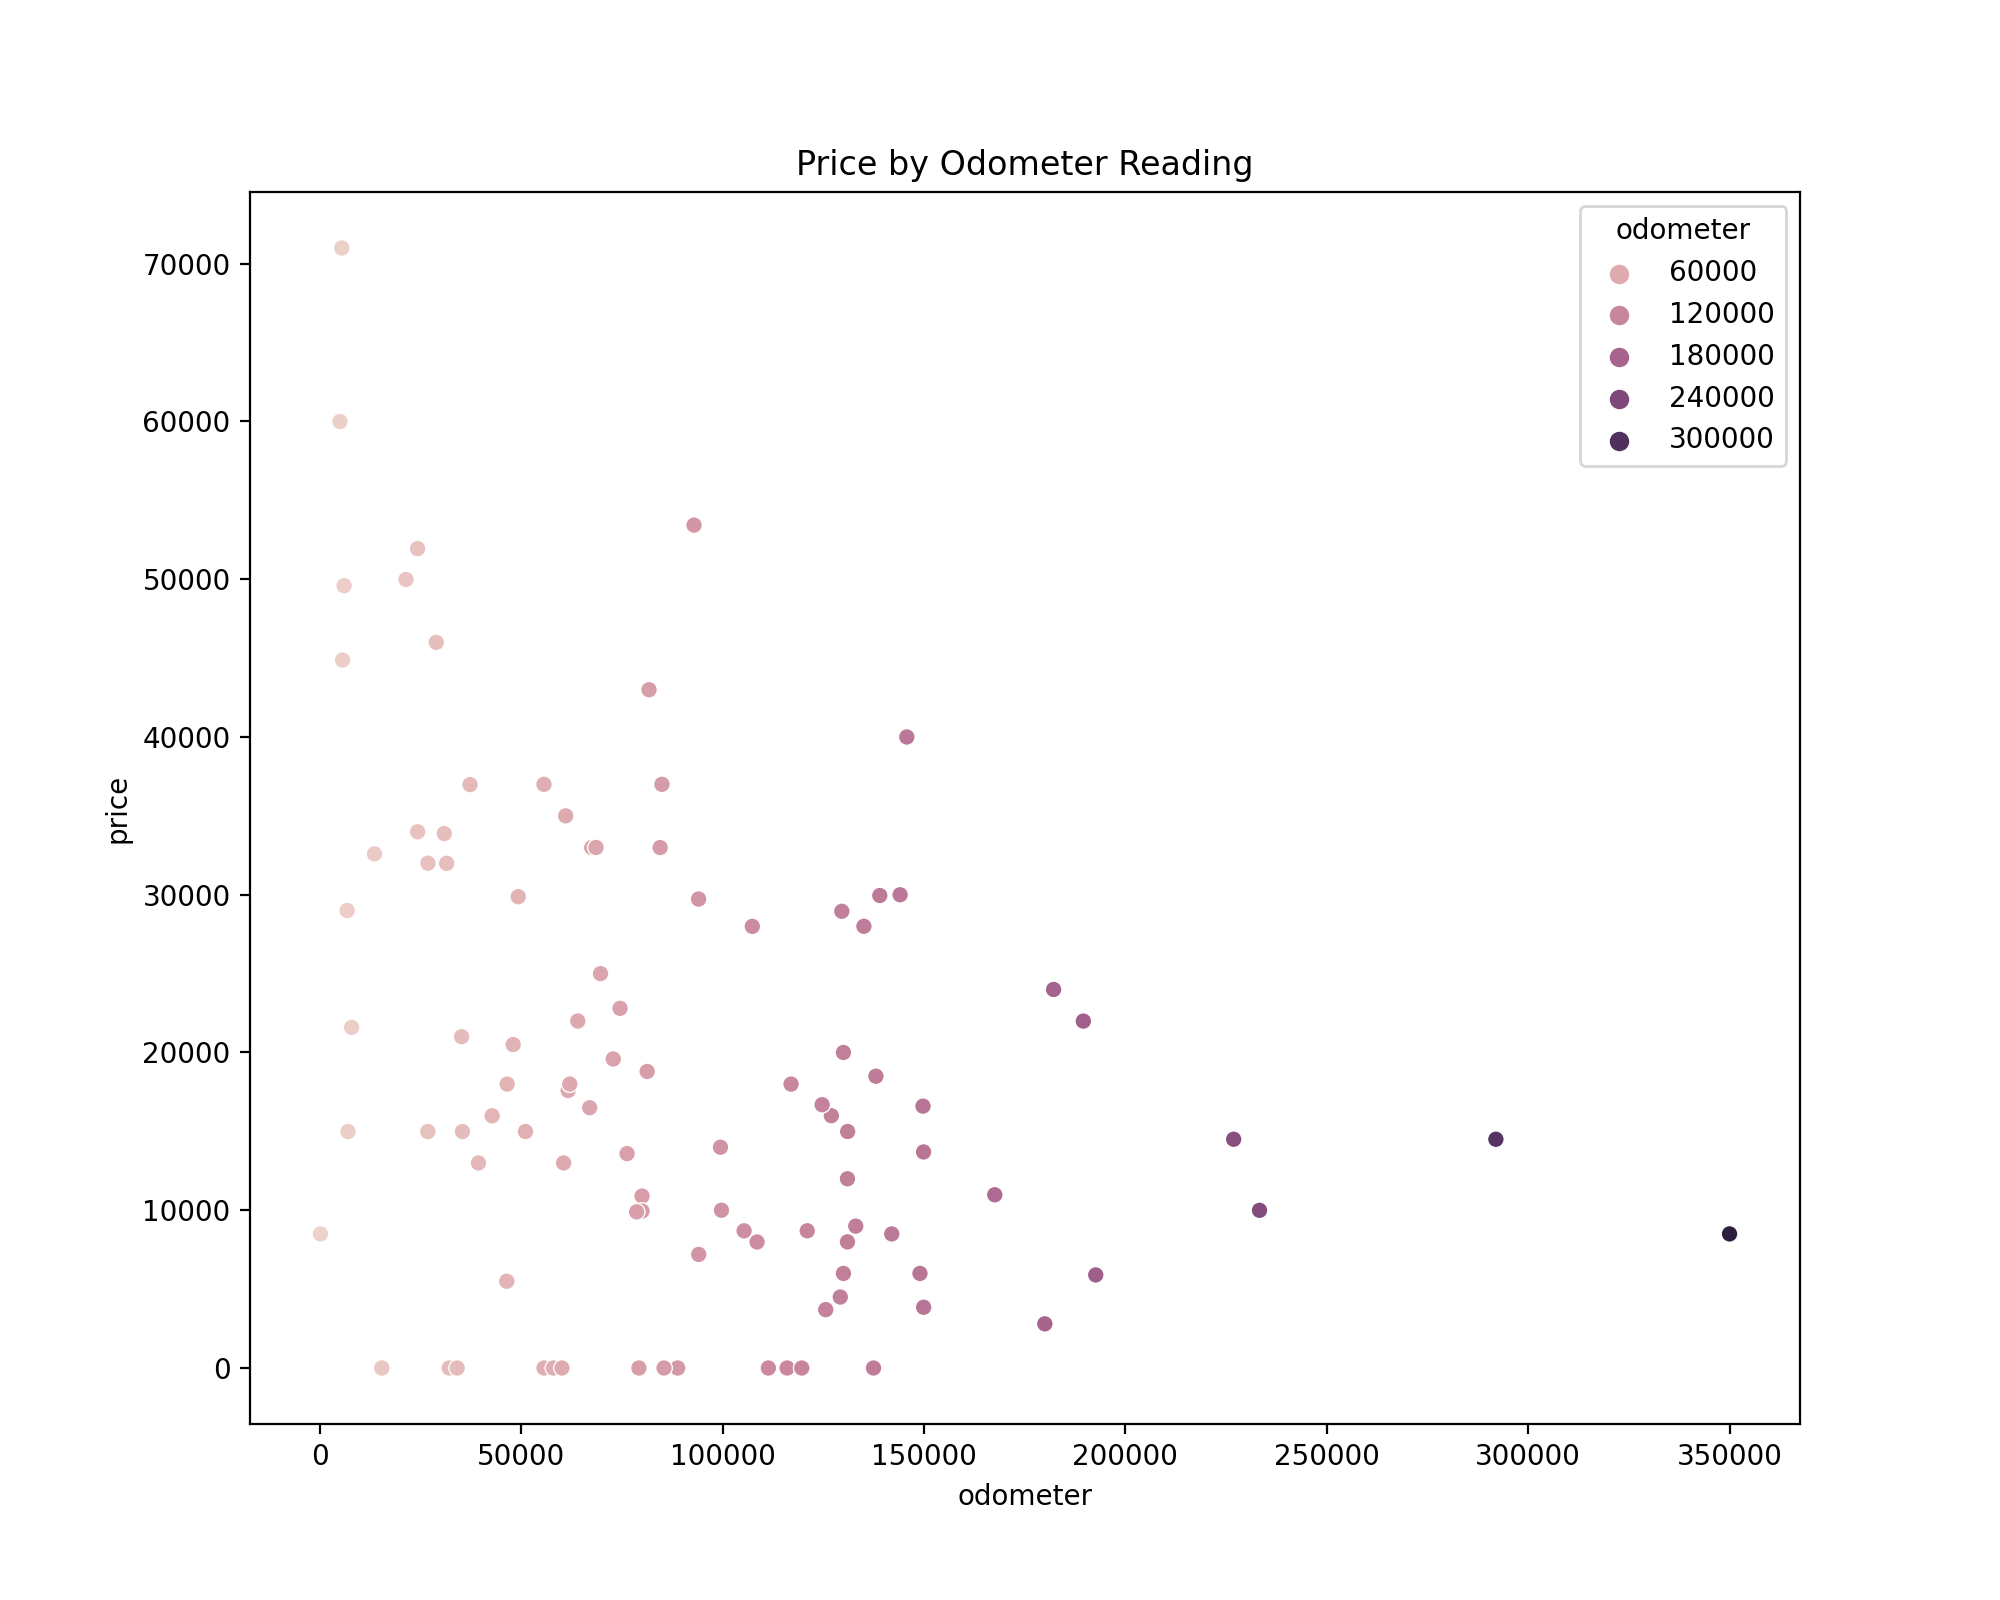

In [290]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Price by Odometer Reading")
sns.color_palette("Paired")
sns.scatterplot(data=data_sample, x='odometer', y='price', hue='odometer')
plt.show()

In [291]:
# The above trends brought this question to mind:
# Q: What is the entry with the highest odometer reading?
data.loc[data['odometer'].idxmax()]

price                20000
year                1951.0
manufacturer     chevrolet
condition             good
cylinders                8
fuel                   gas
odometer        10000000.0
transmission     automatic
drive                  rwd
type                 truck
paint_color         custom
state                   ca
Name: 28738, dtype: object

**OBSERVATION:** The trend here shows that the lower the odometer the higher the price of the used car, the plot shows an outlier (with an odometer reading closer to 200K) at a price higher than two data points with an odometer reading closer to zero, which also shows a lower price value - it is likely a make/model that is normally sold at lower prices. Based on this data, did a quick search for the vehicle with the highest odometer reading we found that it was a 1951 white chevrolet automatic transimission truck - it's odometer was unrealistically high at 10000000. Anything 

In [292]:
# 5. Drop odometer readings that are higher than 200K. In general, a 100K milate is considered a cut-off point for used cars. Older cars often start requiring more expensive and frequent maintenance when the milage exceeds 100K. For our analysis we will keep up to 200K.
data.drop(data[data['odometer'] > 200000].index, inplace = True)

**OBSERVATION:** In exploring the data, noticed that there are entries of prices with extrememly high values (i.e. 3736928711) and we also have entries with a price of zero. It seems reasonable to drop vehicle entries with prices set at zero or above 100,000.

In [293]:
# 6. Drop vehicle entries with prices = 0 and > 100K.  
data.drop(data[data['price'] == 0].index, inplace=True)
data.drop(data[data['price'] > 100000].index, inplace=True)

In [294]:
data['price'].describe()

count    222107.000000
mean      19661.749918
std       14506.443548
min           1.000000
25%        8400.000000
50%       16559.000000
75%       27995.000000
max      100000.000000
Name: price, dtype: float64

#### Visualizing some of this data
The data seems to be ready for modeling but first let's visualize it with the following questions in mind.

* What is the oldest car in this data set? Should we keep all the years available in the dataset?
* How do prices change based on type of fuel?

In [295]:
data.price.describe()

count    222107.000000
mean      19661.749918
std       14506.443548
min           1.000000
25%        8400.000000
50%       16559.000000
75%       27995.000000
max      100000.000000
Name: price, dtype: float64

In [296]:
# Lets take a look at our target column on a sample
# Plot the price of the car by fuel type
#data_slice2 = data[['fuel', 'price']]
#data_sample2 = data_slice2.sample(n=200, random_state=1)
#data_sample2.head()
#var = 'fuel'
#fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
#sns.swarmplot(x = var, y = 'price', data=data_sample2)

In [297]:
data['fuel'].describe()

count     222107
unique         5
top          gas
freq      191341
Name: fuel, dtype: object

<IPython.core.display.Javascript object>


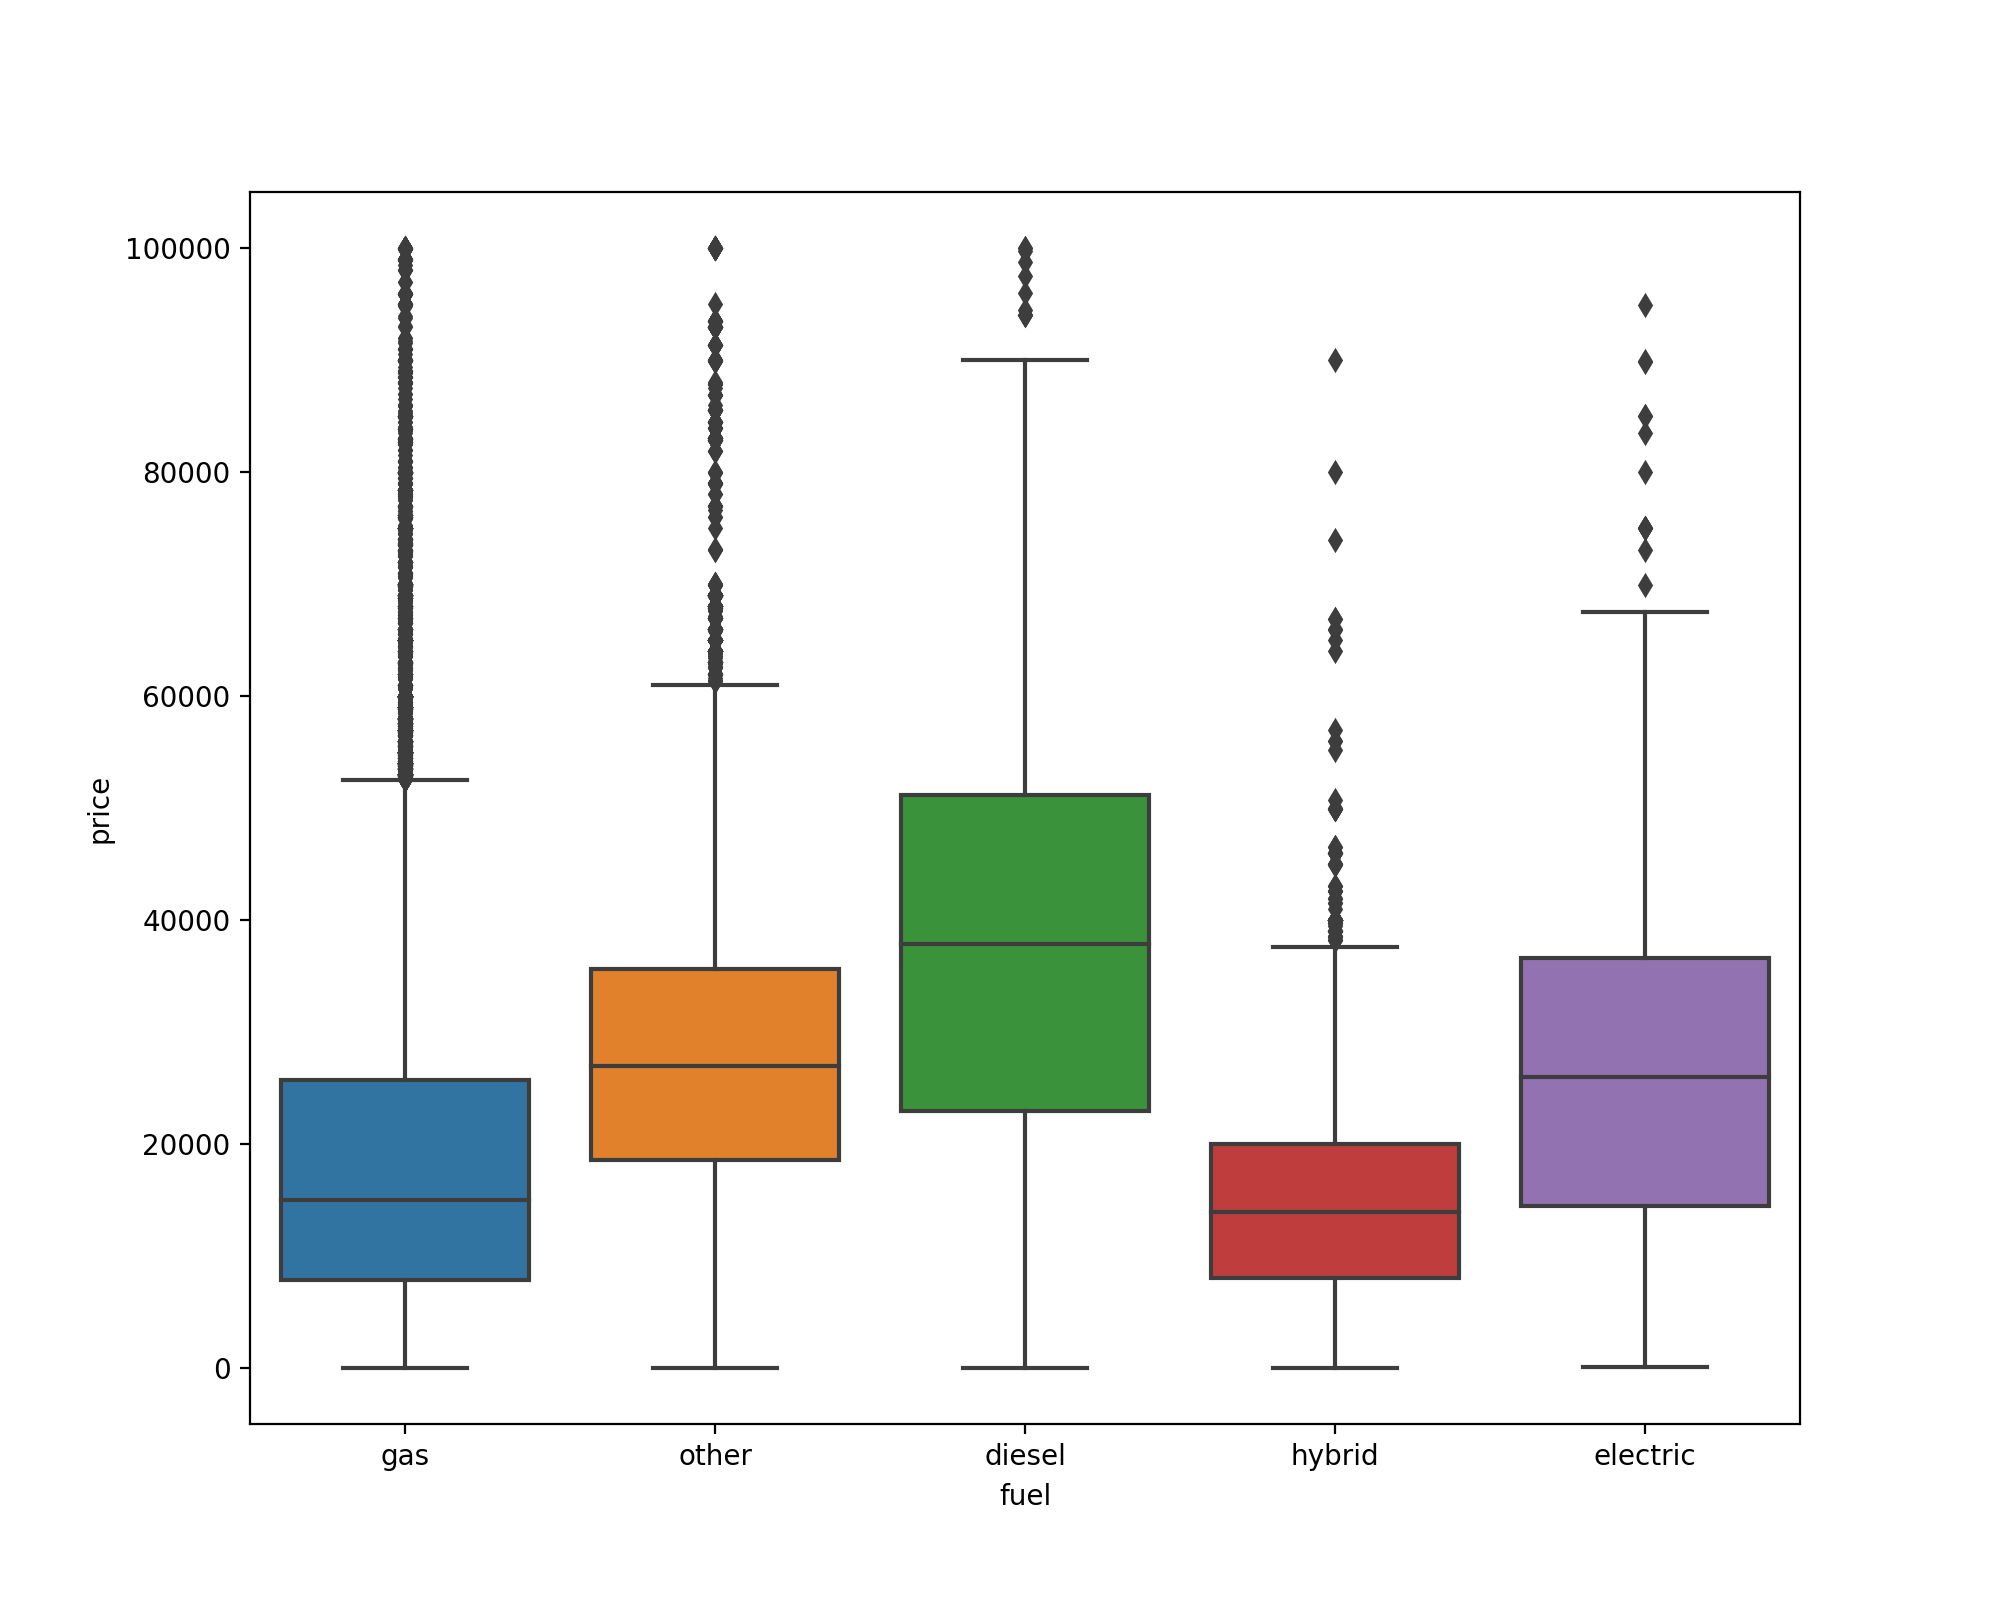

In [251]:
var = 'fuel'
data_sample2 = pd.concat([data['price'], data[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)


The results show that diesel is the most costly, followed by electric, then "other", gas and hybrid seems to have the lowest cost.

In [298]:
# Let's get another visual. This unfortunately didn't plot as the resources in my laptop became overwhelmed.
#var = 'fuel'
#fig, ax = plt.subplots()
#fig.set_size_inches(12,9)
#sns.swarmplot(x=var, y='price', data = data)

In [299]:
# Now let's look at how the age of the car has an impact on price.
data['year'].describe()

count    222107.000000
mean       2011.994345
std           8.332467
min        1900.000000
25%        2009.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

In [319]:
# Let's create a sample to plot the price of a car by year.
data_slice2 = data[['year', 'price']]
data_sample2 = data_slice2.sample(n=2000, random_state=1)
data_sample2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 363445 to 346341
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2000 non-null   float64
 1   price   2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 46.9 KB


<IPython.core.display.Javascript object>


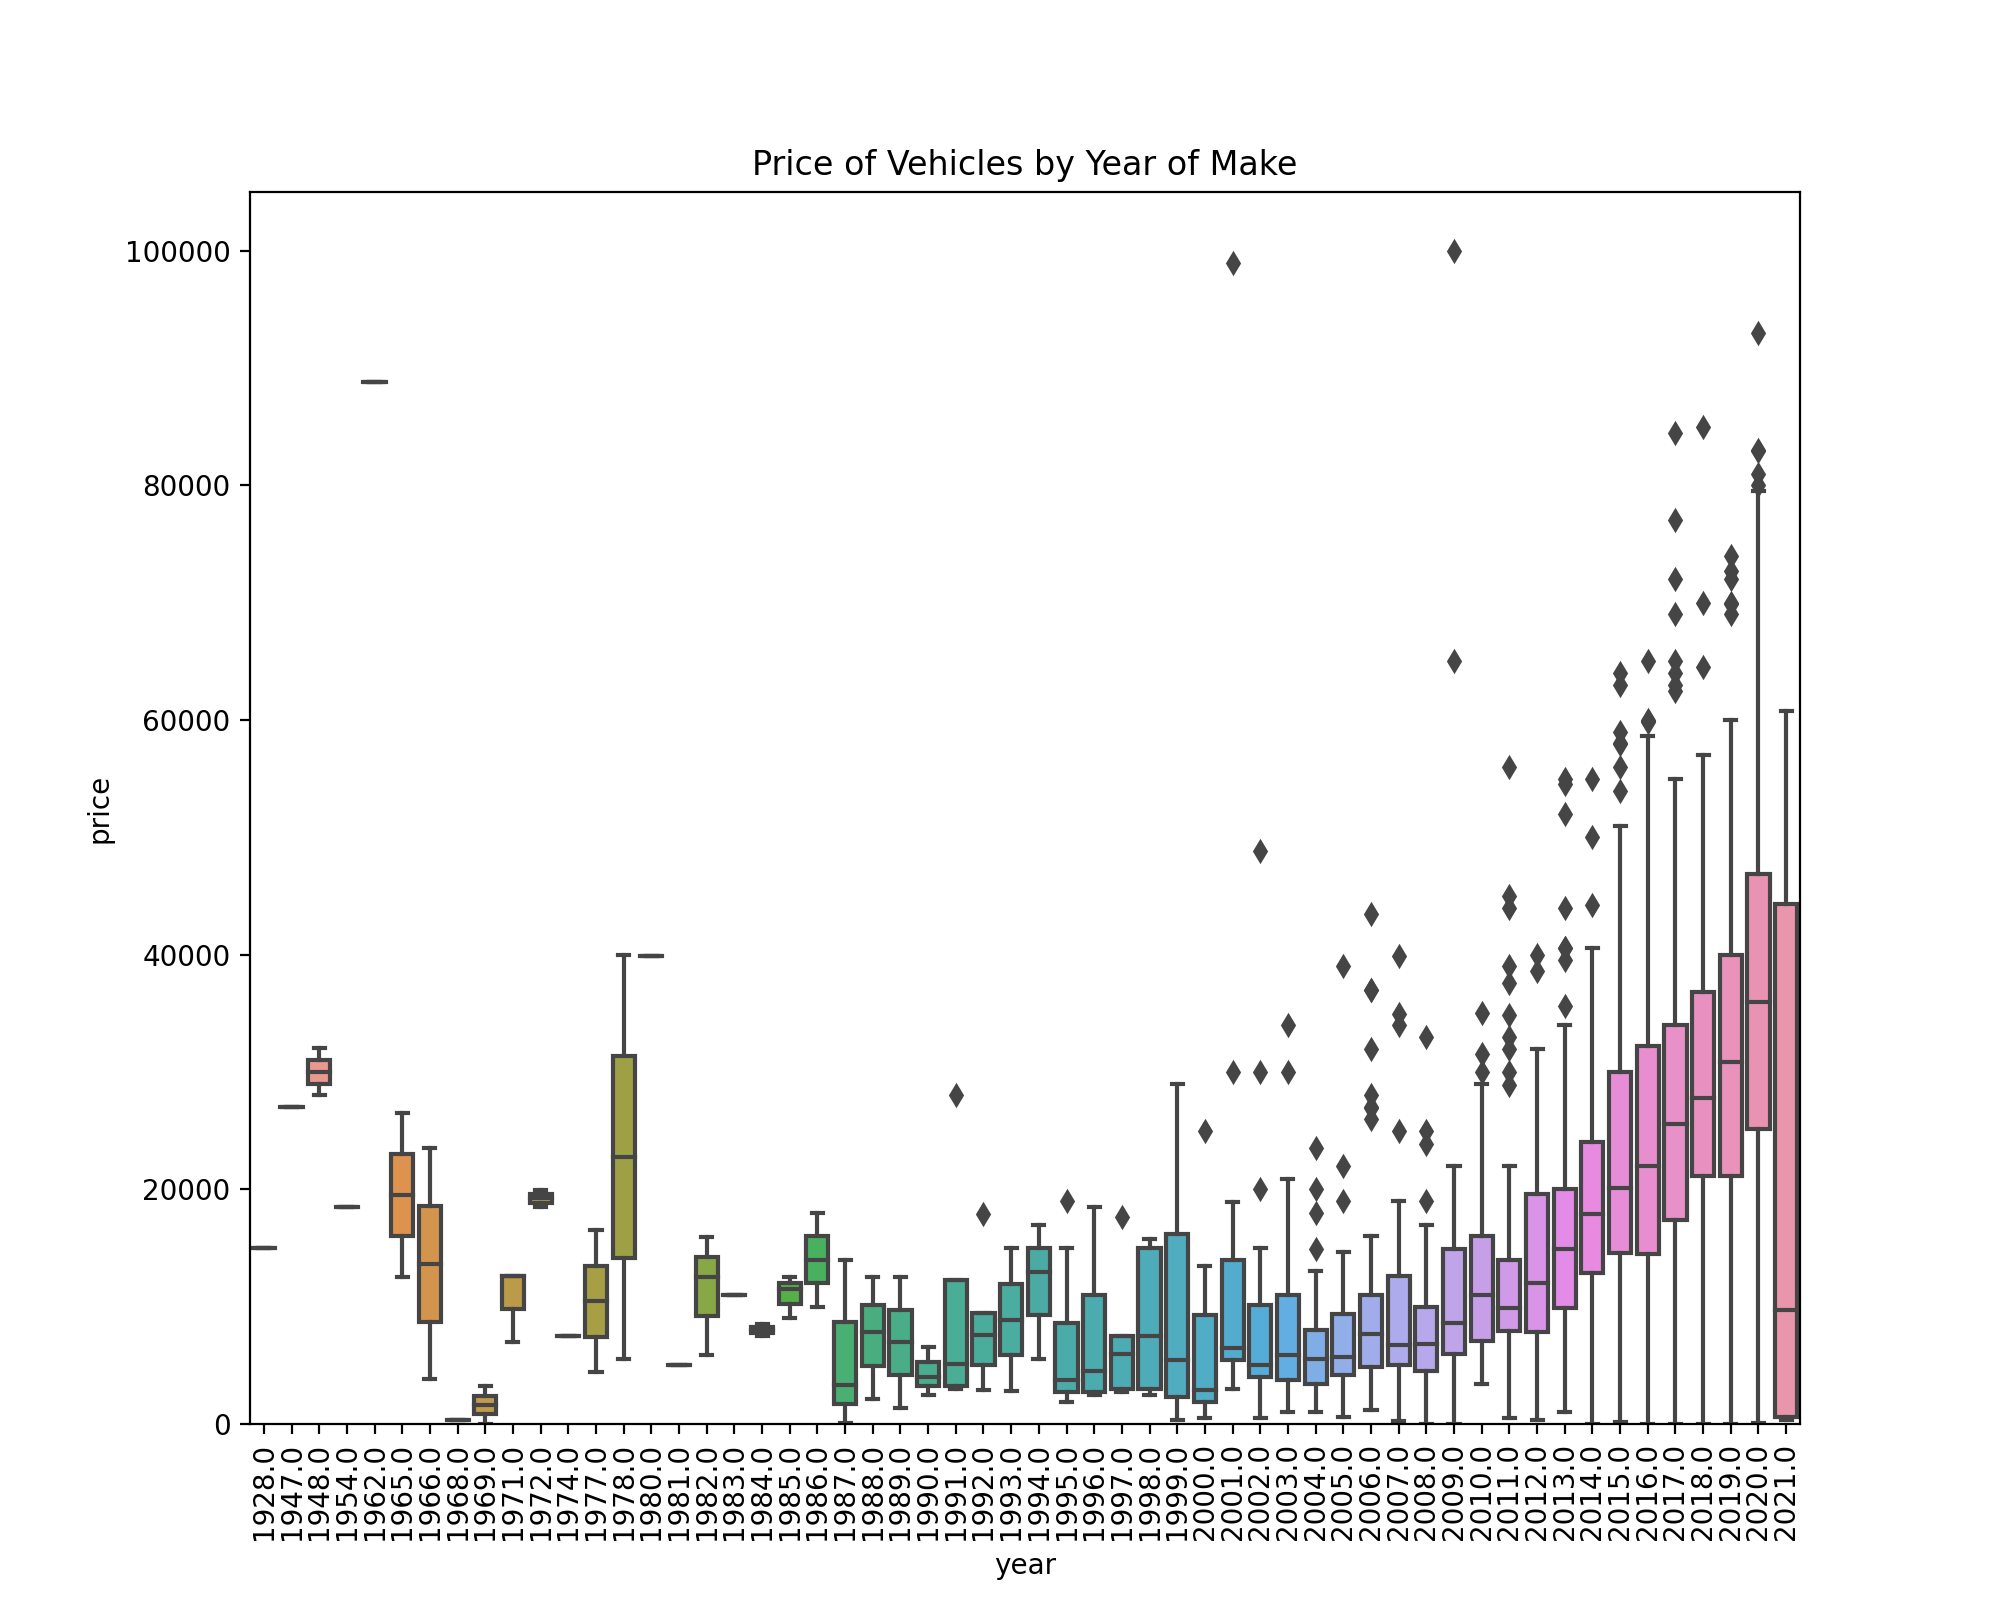

In [320]:
# Now the plot
#data_sample2 = pd.concat([data_sample2['price'], data_sample2['year']], axis=1)
fig, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='year', y="price", data=data_sample2)
fig.axis(ymin=0);
plt.title("Price of Vehicles by Year of Make")
plt.xticks(rotation=90);

**OBSERVATION:** The pattern here is clear the newer the car the higher the price.

<IPython.core.display.Javascript object>


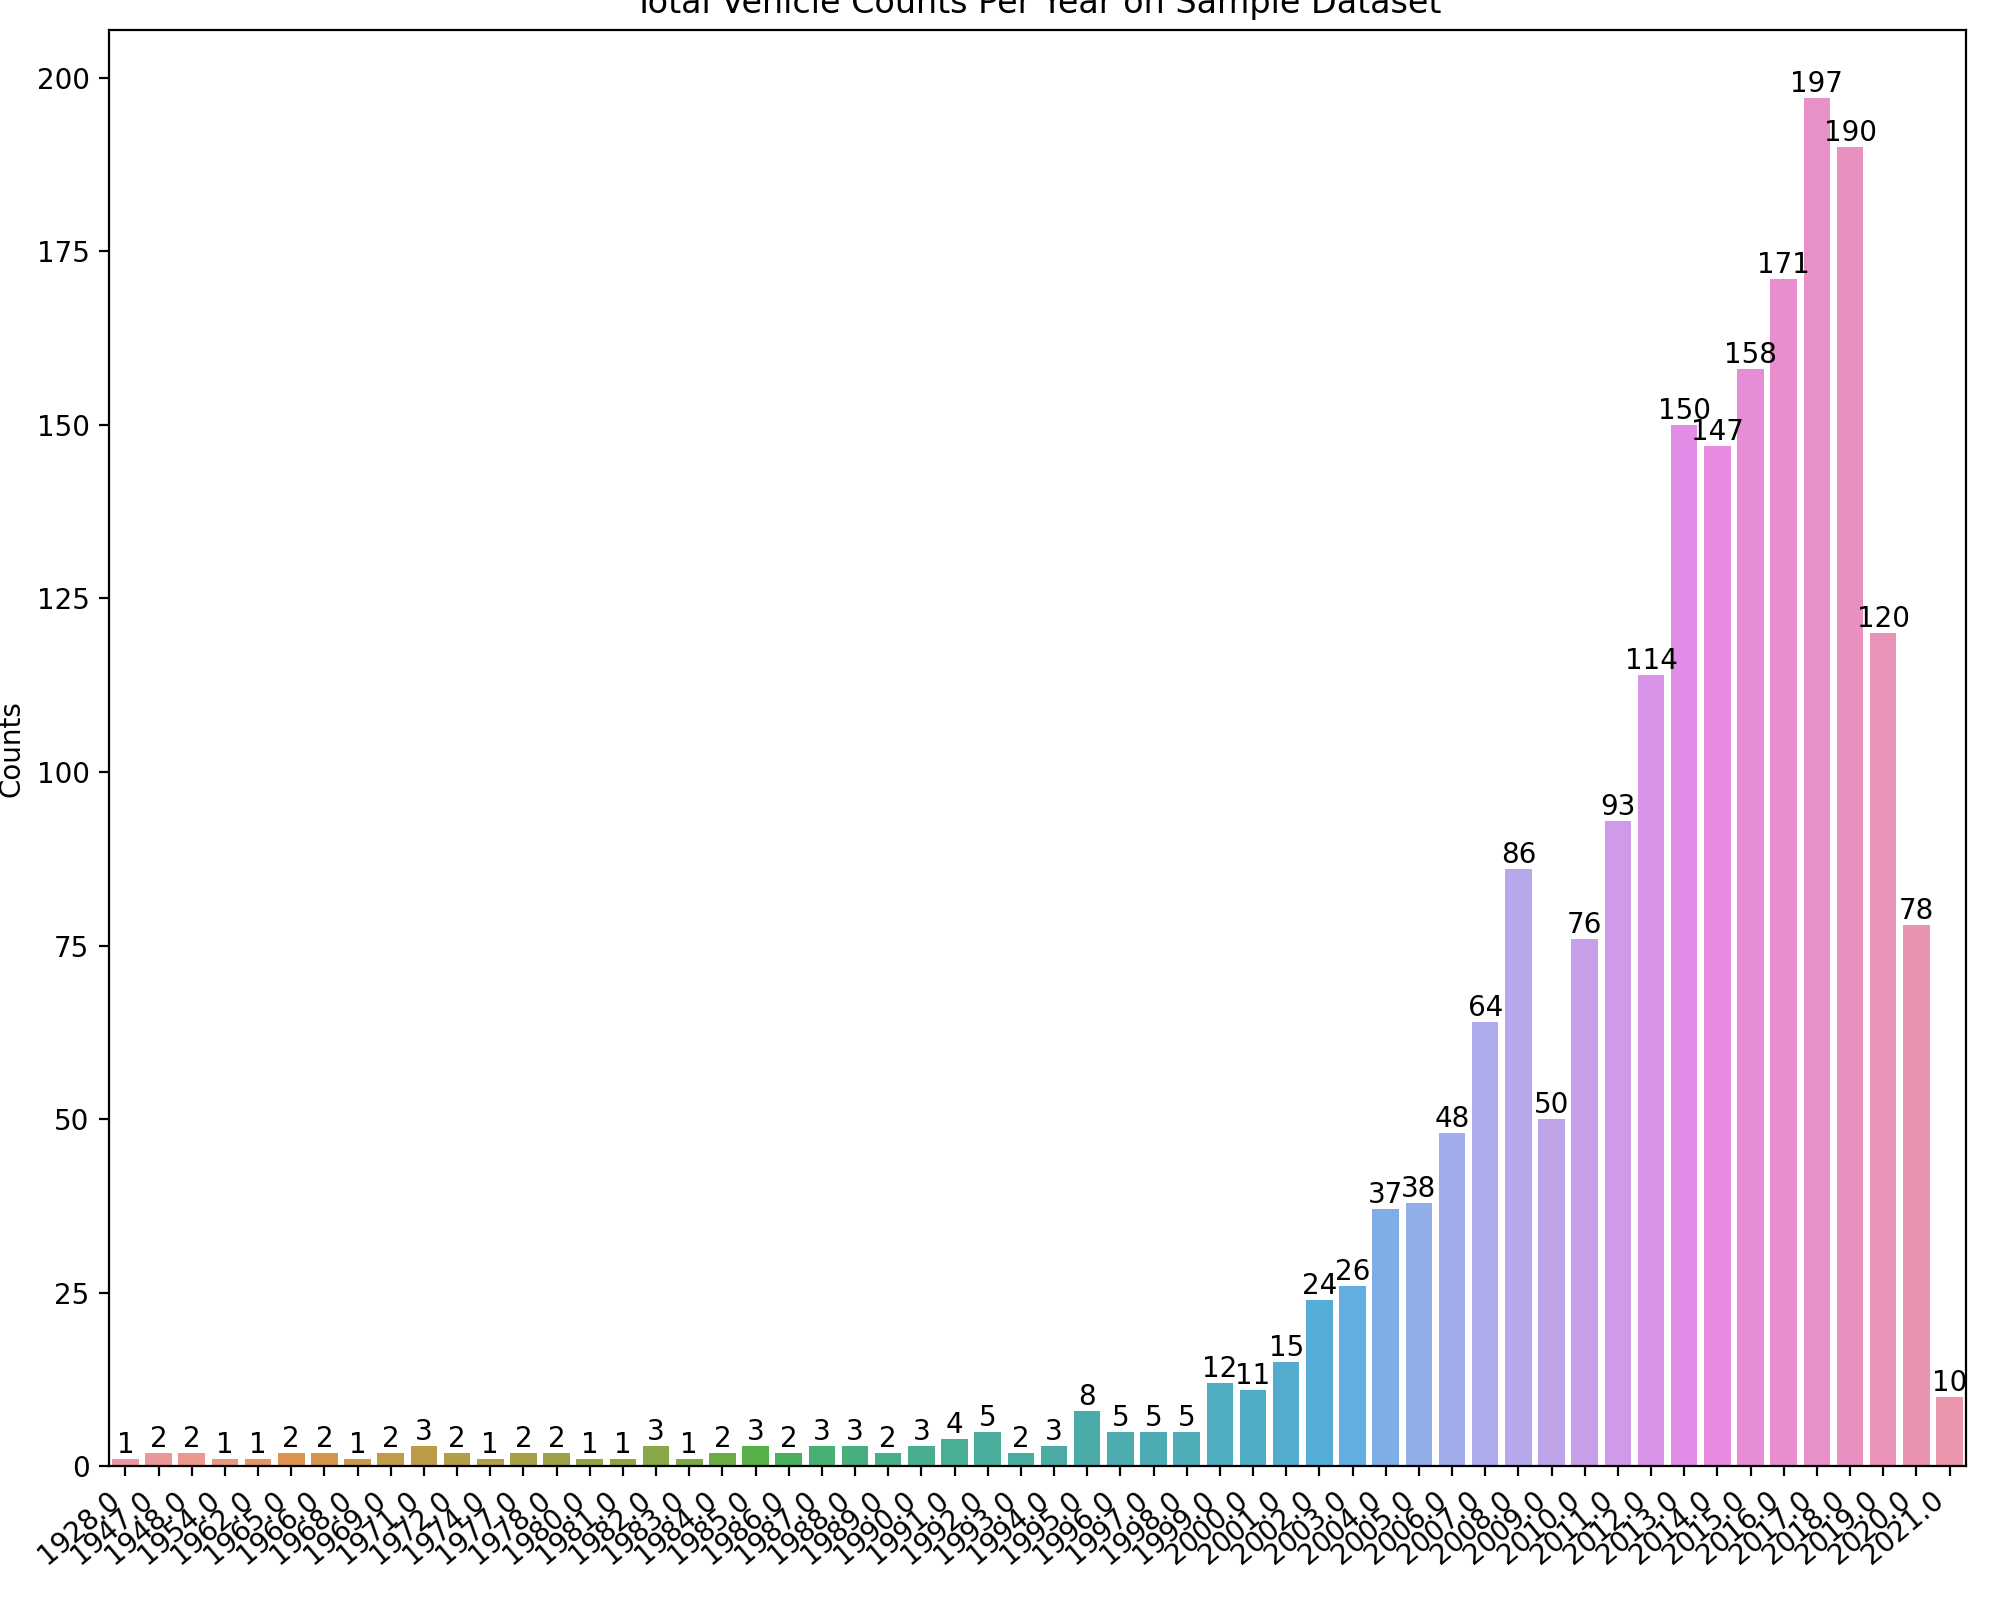

In [323]:
# What is the count of cars in the dataset grouped by year?
fig, ax = plt.subplots(figsize=(10,8))
vehicle_counts_by_year = data_sample2['year'].value_counts()
vyear_plot = sns.barplot(x=vehicle_counts_by_year.index, y=vehicle_counts_by_year.values, ax=ax)
vyear_plot.set_xticklabels(vyear_plot.get_xticklabels(), rotation=40, ha="right")
# Label the the bars with the appropriate count
for v in vyear_plot.containers:
    vyear_plot.bar_label(v)
plt.tight_layout()
plt.title("Total Vehicle Counts Per Year on Sample Dataset")
plt.ylabel("Counts")
plt.show()

**OBSERVATION:** Dropping cars older than 1990 also seems reasonable. They don't seem to add more value to the analysis.

In [339]:
data.drop(data[data['year'] < 1990].index, inplace = True)
data.year.value_counts().sort_values(ascending=False)

2017.0    20682
2018.0    20051
2016.0    17504
2015.0    17493
2013.0    16851
2014.0    16092
2019.0    13984
2012.0    12914
2011.0    10866
2020.0    10124
2008.0     8472
2010.0     8456
2007.0     7281
2009.0     6370
2006.0     5920
2005.0     4835
2004.0     4124
2003.0     3265
2002.0     2398
2001.0     1848
2000.0     1429
1999.0     1283
2021.0     1109
1998.0      785
1997.0      680
1996.0      543
1995.0      480
1994.0      424
1993.0      295
1991.0      278
1990.0      271
1992.0      231
2022.0       39
Name: year, dtype: int64

<IPython.core.display.Javascript object>


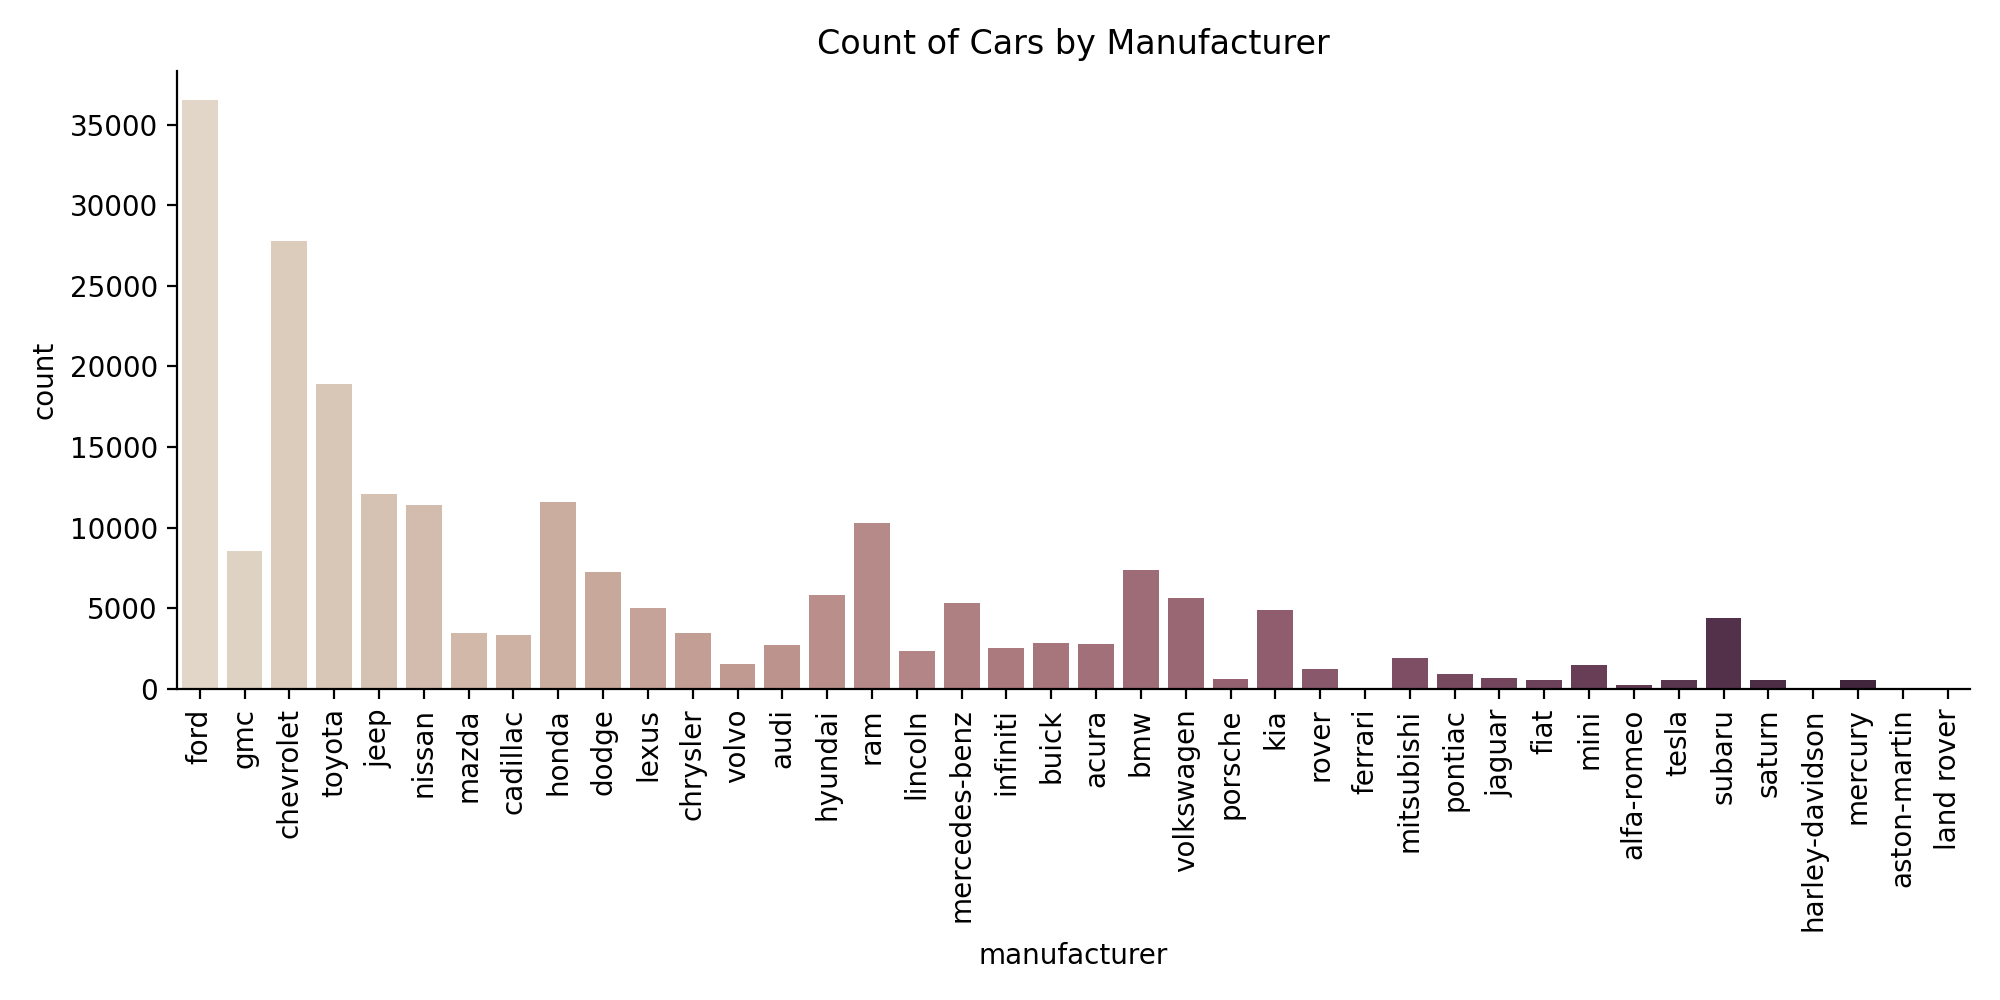

In [359]:
# What is the distribution of cars by manufacturer
%matplotlib notebook
#plt.figure(figsize=(10, 8))
#sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=data);
sns.catplot(x='manufacturer', palette="ch:.25", kind="count", aspect=2, data=data);
plt.xticks(rotation=90);
plt.title("Count of Cars by Manufacturer")
plt.tight_layout()

**OBSERVATION:** The current dataset has predominantly ford made vehicles. It would be interesting to see a data set with a wider spread on Manufacturers.

In [337]:
# Check what type of cars have NaN in condition.
data[data.condition.isna()]

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
187,4500,2008.0,ford,NaN,6,gas,187016.0,automatic,rwd,coupe,red,al
190,4299,2007.0,nissan,NaN,4,gas,189321.0,automatic,fwd,sedan,silver,al
214,3399,2006.0,buick,NaN,6,gas,160218.0,automatic,fwd,sedan,blue,al
216,3900,2009.0,hyundai,NaN,4,gas,162005.0,automatic,rwd,sedan,white,al
225,20995,2011.0,chevrolet,NaN,6,gas,137701.0,automatic,4wd,pickup,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...
426806,11950,2013.0,honda,NaN,6,gas,91785.0,automatic,fwd,sedan,black,wy
426807,10950,2010.0,ram,NaN,8,gas,120427.0,automatic,4wd,truck,black,wy
426828,10550,2018.0,nissan,NaN,4,gas,74425.0,automatic,fwd,SUV,silver,wy
426829,6950,2014.0,nissan,NaN,4,gas,110637.0,automatic,fwd,sedan,silver,wy


In [364]:
data.condition.unique()

array(['excellent', 'good', 'new', nan, 'fair', 'like new', 'salvage'],
      dtype=object)

**OBSERVATION:** Considered dropping all remaining NaN values but the offending entries were all located in the 'condition' feature. The total is 72506 records, keeping them may have more value in analysis since they are newer vehicles

In [366]:
data.condition.count()

144871

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Handling Categorical Data

In [371]:
l=[]
for i in data.columns:
    if data[i].dtypes == 'object':
        print(f'Feature: {i}')
        l.append(i)
print(l)

['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state']


**OBSERVATION:** We are left with 8 categorical features: condition, fuel, manufacturer, transmission, drive, type, paint_color and state.
        
        To handle these features we will use one of the following:
            1. LabelEncoder: for data that is in order.
            2. OneHotEncoder: for data that is not in any order.
            3. Ordinal
                
        Let's visualize the data to pick the correct encoder 
            

In [385]:
# Working with state
var='state'
data[var].value_counts()

ca    24710
fl    15148
tx    11205
ny    10225
oh     9365
or     9361
wa     8178
mi     7408
pa     7216
nc     6426
wi     6206
co     6204
tn     5552
id     5484
va     5116
il     4939
nj     4848
az     4656
ma     4632
ia     4348
mn     3802
mt     3798
ga     3313
in     2971
ks     2960
ok     2677
sc     2675
ak     2589
md     2472
ct     2440
ky     2394
al     2291
mo     2171
nm     1901
nv     1855
nh     1683
vt     1663
hi     1542
dc     1533
ar     1498
me     1427
la     1284
ri     1191
ut      789
wv      614
sd      594
ne      591
de      446
ms      417
wy      310
nd      259
Name: state, dtype: int64

**OBSERVATION:** CA has the most cars to be sold.

<IPython.core.display.Javascript object>


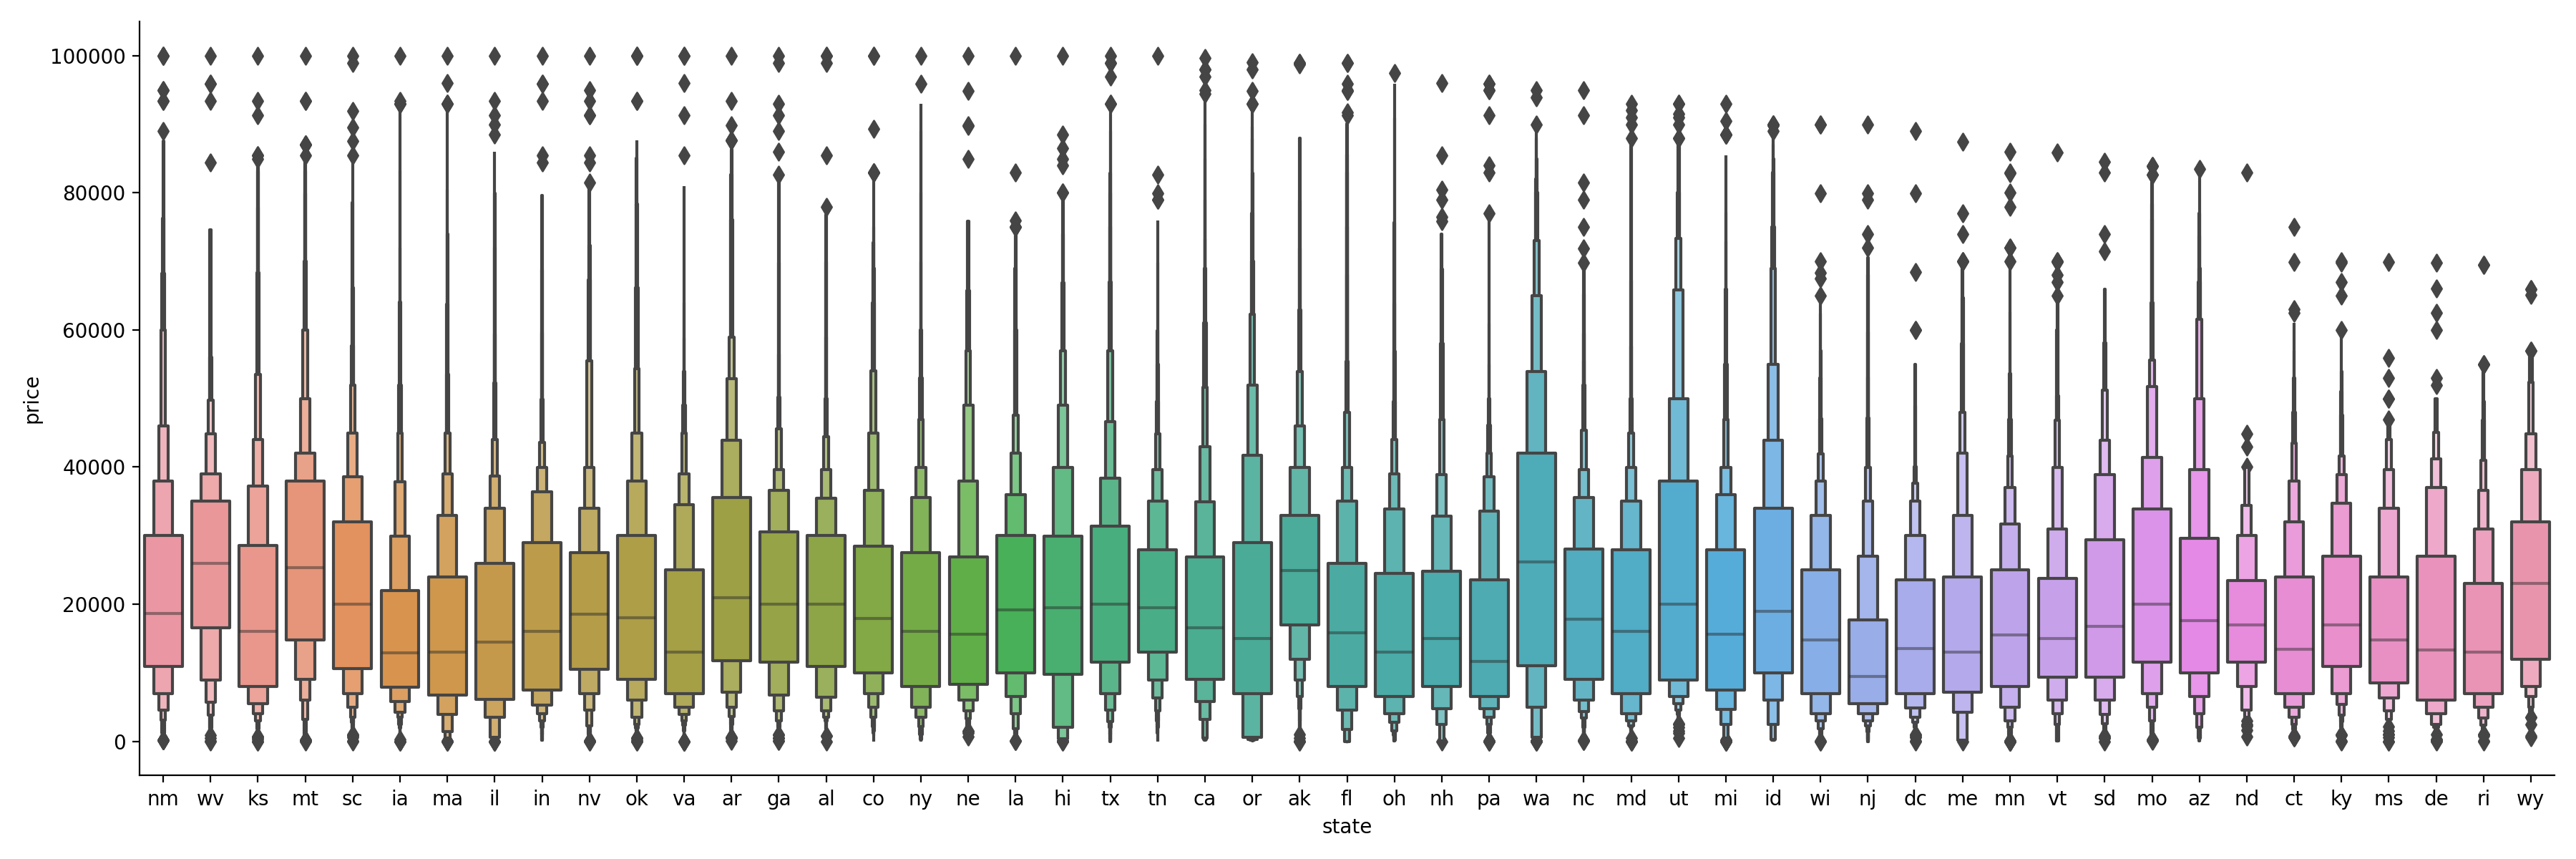

In [393]:
sns.catplot(y='price',x=var,data= data.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

In [396]:
# Here we will use one-hot-encoding
state = data[[var]]
state = pd.get_dummies(state,drop_first=True)
state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217377 entries, 31 to 426879
Data columns (total 50 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   state_al  217377 non-null  uint8
 1   state_ar  217377 non-null  uint8
 2   state_az  217377 non-null  uint8
 3   state_ca  217377 non-null  uint8
 4   state_co  217377 non-null  uint8
 5   state_ct  217377 non-null  uint8
 6   state_dc  217377 non-null  uint8
 7   state_de  217377 non-null  uint8
 8   state_fl  217377 non-null  uint8
 9   state_ga  217377 non-null  uint8
 10  state_hi  217377 non-null  uint8
 11  state_ia  217377 non-null  uint8
 12  state_id  217377 non-null  uint8
 13  state_il  217377 non-null  uint8
 14  state_in  217377 non-null  uint8
 15  state_ks  217377 non-null  uint8
 16  state_ky  217377 non-null  uint8
 17  state_la  217377 non-null  uint8
 18  state_ma  217377 non-null  uint8
 19  state_md  217377 non-null  uint8
 20  state_me  217377 non-null  uint8
 21  state_mi 

In [373]:
# manufacturer
var='manufacturer'
data[var].value_counts()

ford               36523
chevrolet          27801
toyota             18896
jeep               12085
honda              11578
nissan             11412
ram                10318
gmc                 8552
bmw                 7402
dodge               7240
hyundai             5820
volkswagen          5619
mercedes-benz       5349
lexus               5028
kia                 4912
subaru              4388
chrysler            3444
mazda               3441
cadillac            3376
buick               2833
acura               2796
audi                2710
infiniti            2538
lincoln             2381
mitsubishi          1950
volvo               1520
mini                1468
rover               1219
pontiac              937
jaguar               700
porsche              594
tesla                580
fiat                 552
mercury              550
saturn               527
alfa-romeo           262
ferrari               29
harley-davidson       27
aston-martin          13
land rover             7


<IPython.core.display.Javascript object>


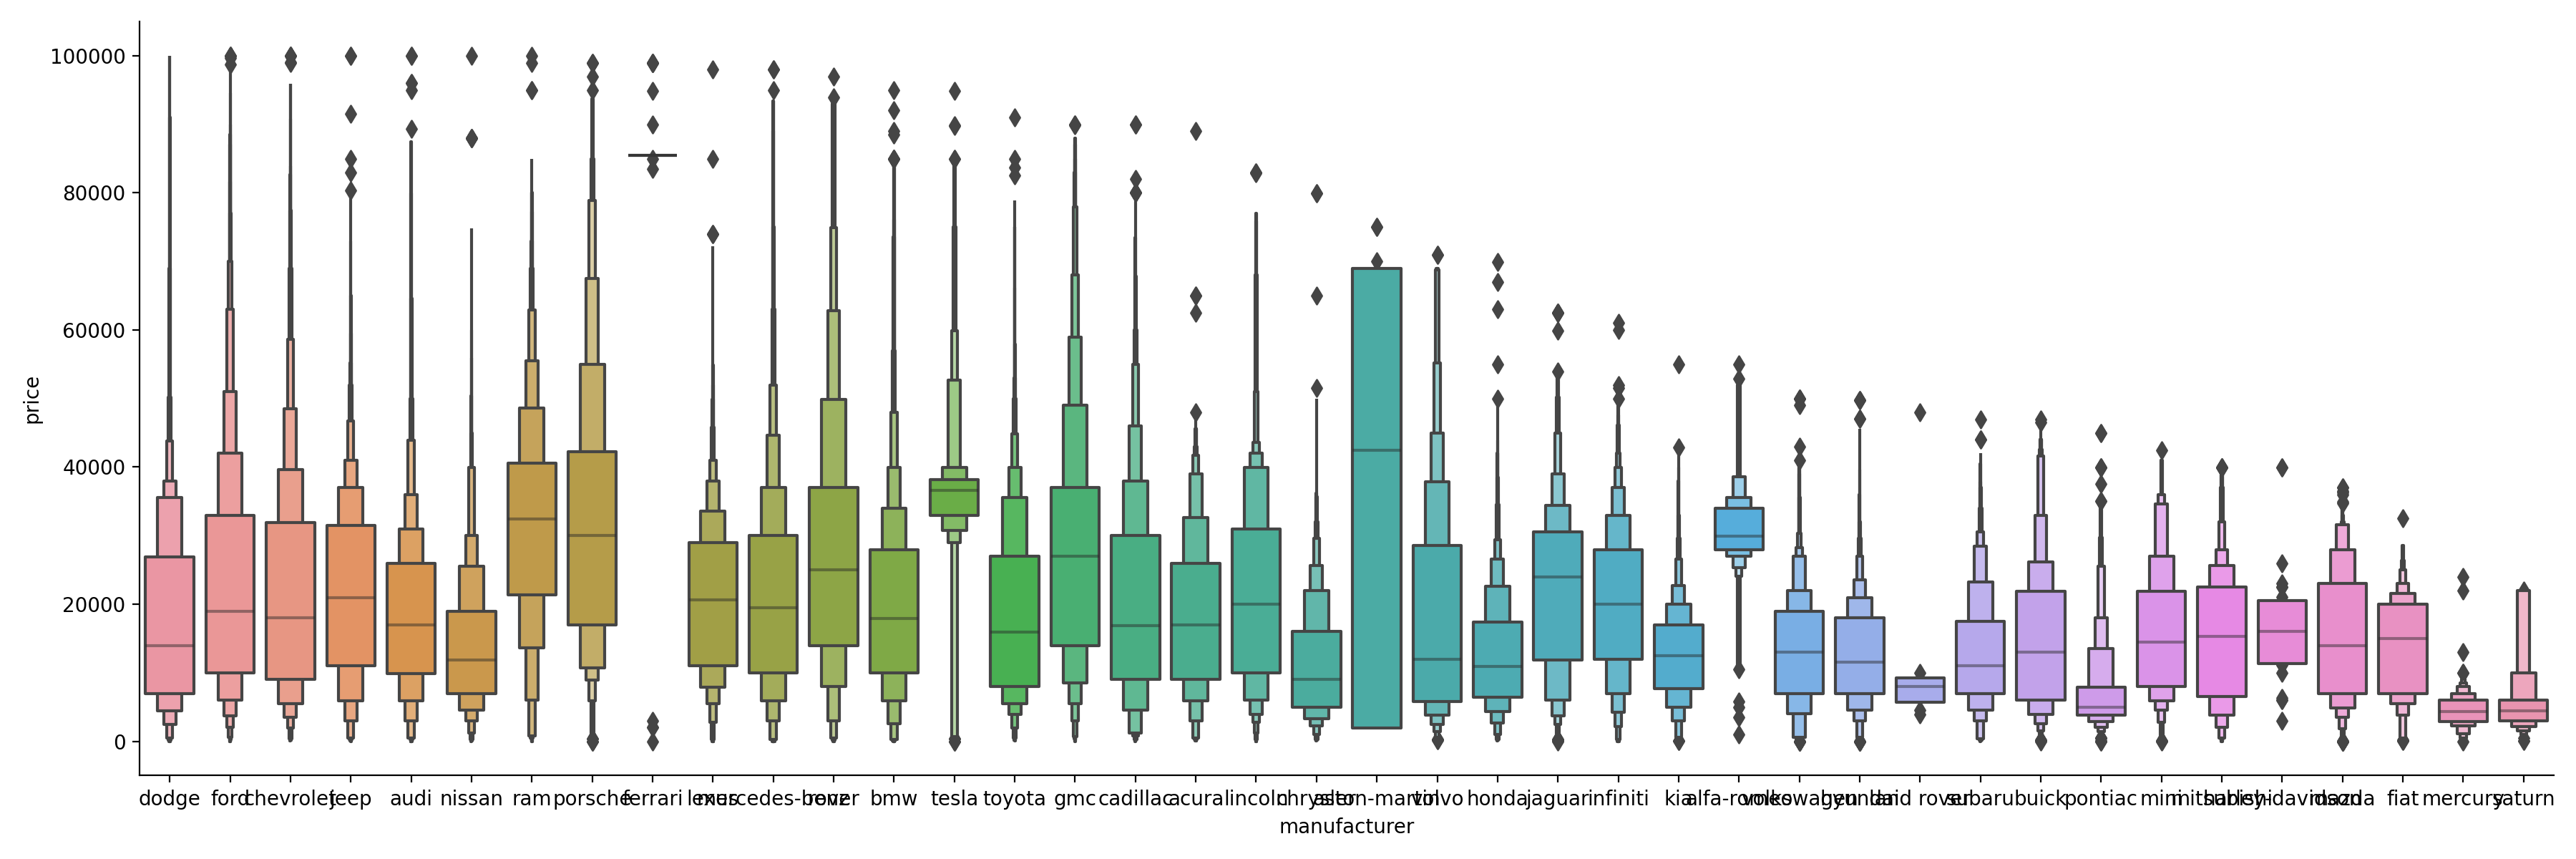

<function matplotlib.pyplot.show(block=None)>

In [384]:
sns.catplot(y='price',x=var ,data= data.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

**OBSERVATION:** This generated a large amount of unique state_ like features/columns. The same was looking to be true with manufacturer as well. So, encoded categorical features as follows.

In [428]:
# 1. OneHot encode categorical features with smaller amount (< 12) of unique values except condition (as this will be treated differently below)
#    Features that fell into this category were the following:
cols = ['fuel', 'transmission', 'drive']
mutated_data = pd.get_dummies(data,columns=cols)
mutated_data = mutated_data.reset_index()
mutated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144871 entries, 0 to 144870
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   144871 non-null  int64  
 1   price                   144871 non-null  int64  
 2   year                    144871 non-null  float64
 3   manufacturer            144871 non-null  object 
 4   condition               144871 non-null  object 
 5   cylinders               144871 non-null  int64  
 6   odometer                144871 non-null  float64
 7   type                    144871 non-null  object 
 8   paint_color             144871 non-null  object 
 9   state                   144871 non-null  object 
 10  fuel_diesel             144871 non-null  uint8  
 11  fuel_electric           144871 non-null  uint8  
 12  fuel_gas                144871 non-null  uint8  
 13  fuel_hybrid             144871 non-null  uint8  
 14  fuel_other          

In [429]:
# For feature condition we still have NaNs and per info() the only feature with the aforementioned values. Let's drop them.
mutated_data.dropna(inplace=True)
mutated_data.isna().sum().sort_values(ascending=False)
mutated_data.shape

(144871, 21)

In [430]:
# 2. Use OrdinalEncoder for condition
conditions = (data['condition'].unique()).tolist()
enc = OrdinalEncoder(categories=[conditions], dtype=int)
mutated_data['condition'] = enc.fit_transform(mutated_data[['condition']])
mutated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144871 entries, 0 to 144870
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   144871 non-null  int64  
 1   price                   144871 non-null  int64  
 2   year                    144871 non-null  float64
 3   manufacturer            144871 non-null  object 
 4   condition               144871 non-null  int64  
 5   cylinders               144871 non-null  int64  
 6   odometer                144871 non-null  float64
 7   type                    144871 non-null  object 
 8   paint_color             144871 non-null  object 
 9   state                   144871 non-null  object 
 10  fuel_diesel             144871 non-null  uint8  
 11  fuel_electric           144871 non-null  uint8  
 12  fuel_gas                144871 non-null  uint8  
 13  fuel_hybrid             144871 non-null  uint8  
 14  fuel_other          

In [434]:
# 3. Decided that categorical features with large amount (>=12) of unique values would be encoded using LabelEncoder. 
#    The features that fell into this category were the following:
cols2 = ['manufacturer','type', 'paint_color', 'state']
mutated_data[cols2] = mutated_data[cols2].apply(LabelEncoder().fit_transform)
mutated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144871 entries, 0 to 144870
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   144871 non-null  int64  
 1   price                   144871 non-null  int64  
 2   year                    144871 non-null  float64
 3   manufacturer            144871 non-null  int64  
 4   condition               144871 non-null  int64  
 5   cylinders               144871 non-null  int64  
 6   odometer                144871 non-null  float64
 7   type                    144871 non-null  int64  
 8   paint_color             144871 non-null  int64  
 9   state                   144871 non-null  int64  
 10  fuel_diesel             144871 non-null  uint8  
 11  fuel_electric           144871 non-null  uint8  
 12  fuel_gas                144871 non-null  uint8  
 13  fuel_hybrid             144871 non-null  uint8  
 14  fuel_other          

We have all columns with numeric values. We are now ready for modeling.

#### Split the data into train and test sets.

In [440]:
# Split the data into X and y. 
# The train_test_split method was called with the stratify argument to ensure that both the train and test sets would 
# have a similar proportion of classes.
X_train, X_test, y_train, y_test = train_test_split(mutated_data.drop('price', axis = 1), mutated_data.price, 
                                                    random_state = 42,
                                                    test_size = 0.3)

In [453]:
# Scale the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [455]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

<IPython.core.display.Javascript object>


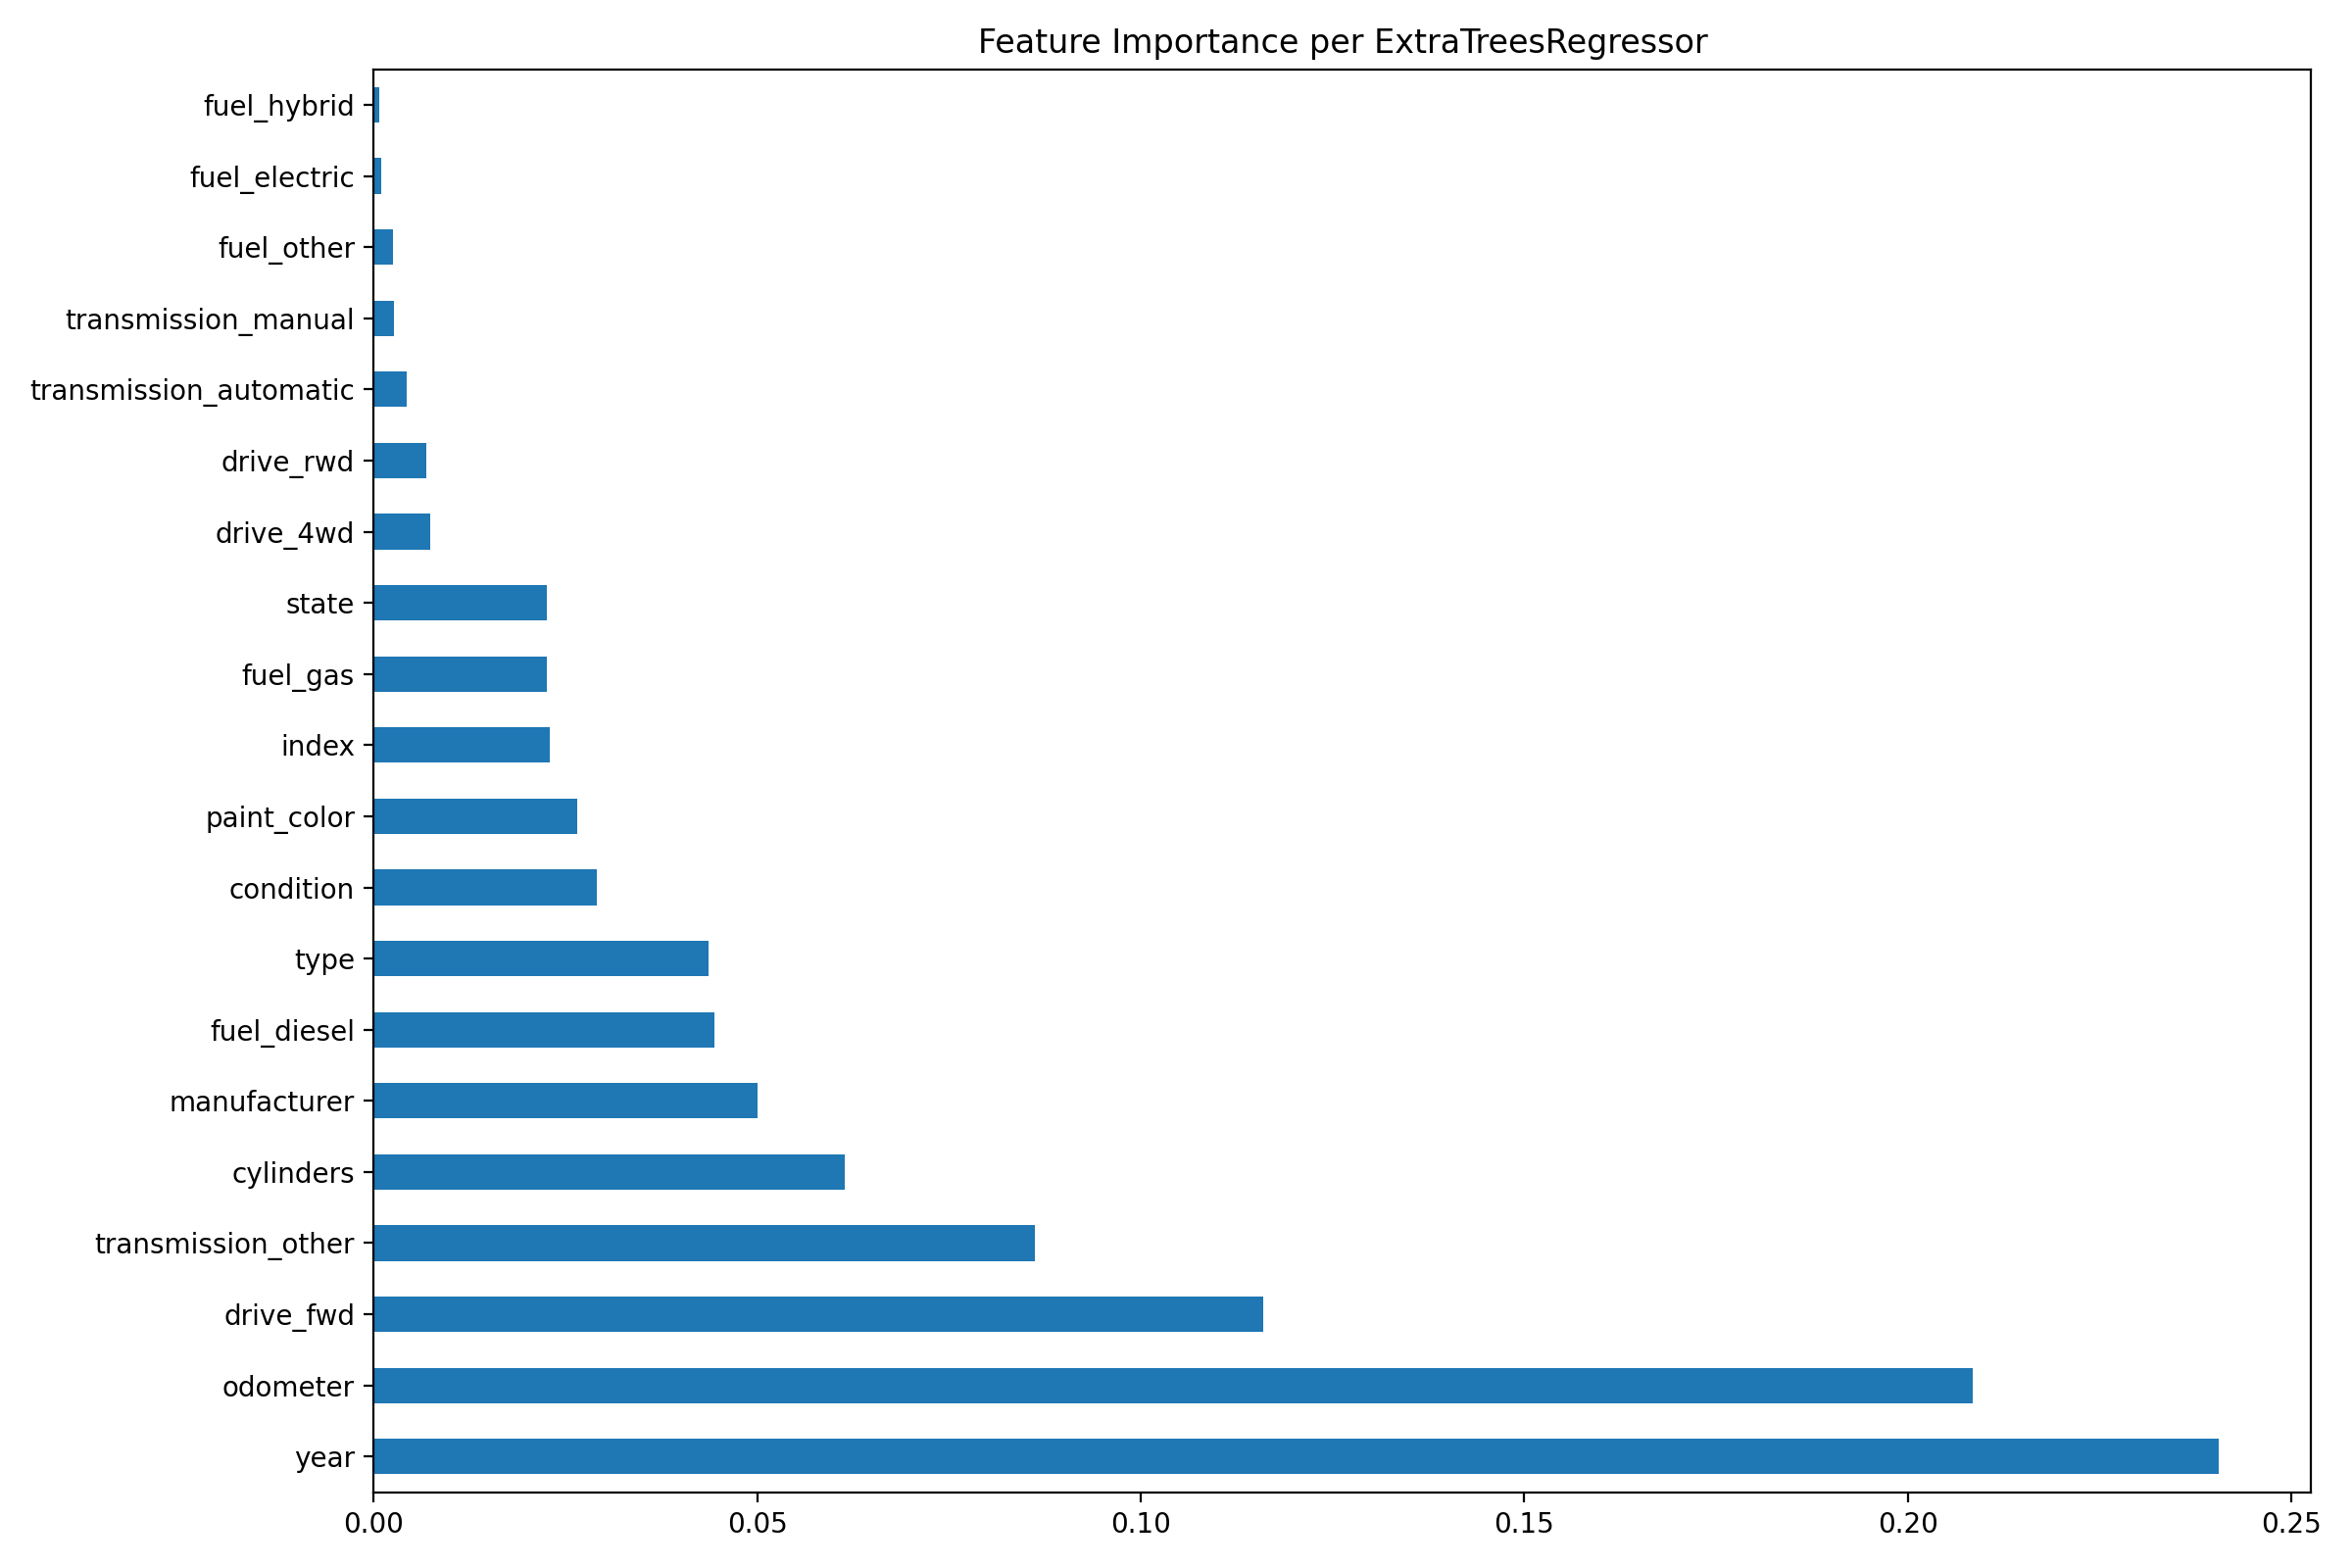

In [459]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance per ExtraTreesRegressor")
plt.tight_layout()
plt.show()

#### LinearRegression

In [460]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.6365366216049669
Accuracy on Testing set:  0.641198096704603


**OBSERVATION:** Accuracy was not as high as expected - we can do better!

#### RandomForestRegressor

In [462]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9843571672065429
Accuracy on Testing set:  0.8907927945254835


**OBSERVATION:** Accuracy on this model is higher.

Let's explore other options to uncover more patterns in the data...

#### Polynomial Features

In [449]:
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train[['year', 'odometer', 'cylinders']])
X_test_poly = poly_features.fit_transform(X_test[['year', 'odometer', 'cylinders']])
columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns = columns)
train_df.head()

,year,odometer,cylinders,year^2,year odometer,year cylinders,odometer^2,odometer cylinders,cylinders^2,year^3,year^2 odometer,year^2 cylinders,year odometer^2,year odometer cylinders,year cylinders^2,odometer^3,odometer^2 cylinders,odometer cylinders^2,cylinders^3
0,2003.0,149000.0,6.0,4012009.0,298447000.0,12018.0,2.220100e+10,894000.0,36.0,8.036054e+09,5.977893e+11,24072054.0,4.446860e+13,1.790682e+09,72108.0,3.307949e+15,1.332060e+11,5364000.0,216.0
1,2016.0,27440.0,8.0,4064256.0,55319040.0,16128.0,7.529536e+08,219520.0,64.0,8.193540e+09,1.115232e+11,32514048.0,1.517954e+12,4.425523e+08,129024.0,2.066105e+13,6.023629e+09,1756160.0,512.0
2,1990.0,185000.0,8.0,3960100.0,368150000.0,15920.0,3.422500e+10,1480000.0,64.0,7.880599e+09,7.326185e+11,31680800.0,6.810775e+13,2.945200e+09,127360.0,6.331625e+15,2.738000e+11,11840000.0,512.0
3,2020.0,6395.0,6.0,4080400.0,12917900.0,12120.0,4.089602e+07,38370.0,36.0,8.242408e+09,2.609416e+10,24482400.0,8.260997e+10,7.750740e+07,72720.0,2.615301e+11,2.453762e+08,230220.0,216.0
4,2007.0,84000.0,4.0,4028049.0,168588000.0,8028.0,7.056000e+09,336000.0,16.0,8.084294e+09,3.383561e+11,16112196.0,1.416139e+13,6.743520e+08,32112.0,5.927040e+14,2.822400e+10,1344000.0,64.0


#### SequentialFeatureSelector
Using the polynomail features we will use forward selection to select three features using LinearRegression()

In [450]:
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
best_features_df.head()

,odometer,year cylinders,year^2 cylinders
0,149000.0,12018.0,24072054.0
1,27440.0,16128.0,32514048.0
2,185000.0,15920.0,31680800.0
3,6395.0,12120.0,24482400.0
4,84000.0,8028.0,16112196.0


In [454]:
# Running simple correlations with other features and price.
price_corr = mutated_data.corrwith(mutated_data['price'])
price_corr

index                    -0.019148
price                     1.000000
year                      0.573961
manufacturer             -0.048122
condition                 0.055716
cylinders                 0.346602
odometer                 -0.579391
type                      0.044952
paint_color               0.042844
state                    -0.015047
fuel_diesel               0.230155
fuel_electric             0.050186
fuel_gas                 -0.284035
fuel_hybrid              -0.033247
fuel_other                0.198862
transmission_automatic   -0.345712
transmission_manual      -0.083239
transmission_other        0.412731
drive_4wd                 0.205704
drive_fwd                -0.326374
drive_rwd                 0.143142
dtype: float64

**OBSERVATION:** Price shows positive correlation with year, cylinders and 4wd. Electric vehicles and those running on diesel also have a positive correlation with price. Odometer reading (at -0.579391 corr), front wheel drive 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Once the data was sanitized we started the analysis and had the following observations:

[General Obserations]
* Features with strongest impact on price resulted in year, odometer reading, number of cylinders, 
* We also see Electric vehicles with positive correlation with price.
* At this time, we can recommend that inventory includes vehicles with lower odometer readings, more cylinders and ideally not too old. However, with the current data we can't make predictions on sales/profit details.
* The data analyzed didn't provide sufficient context to determine precisely what type of cars would result in higher profits. Without this data, it seems like the information would be incomplete if we bring it back to our client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Data Deployment
The data analysis revealed that used car buyers are willing to pay more for cars with lower odometer readings, ideally that are newer and with automatic transmissions.  Electric or hybrid cars also show . Hence, keeping these types of cars in the inventory has a high potential of increasing sales. The analyzed dataset didn't cotain sufficient data on other features like fuel efficency, horsepower and other details that could also play a role in the car prices. The recommendation is to gather more data on the missing features, previous years sales details. This information will enable us to train the model to perform more accurate predictions on not only items that impact the price of the car, but also on those items the customers are willing to pay more on and thus with a potentially positive impact on sales and possibly profits.


### Next Steps
* Collect more data to determine what other features can have a stronger impact on used car prices, that will increase their appeal to used car buyers, which could translate to better sales/profits.
* Some features that could positively impact price are horsepower, fuel efficiency, which were not included on the provided dataset.
* Richer data may help train a model that can better predict profits for a given used car agency based on their inventory and previous sales data.